In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


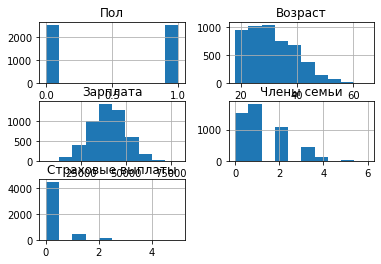

In [5]:
df.hist()

plt.show()

In [6]:
df['Страховые выплаты'].value_counts(normalize=True)*100

0    88.72
1     8.46
2     2.30
3     0.36
4     0.14
5     0.02
Name: Страховые выплаты, dtype: float64

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [9]:
lr = LinearRegression()

In [10]:
cross_val_score(lr, df.drop(['Страховые выплаты'], axis = 1), df['Страховые выплаты']).mean()

0.42779425802804916

In [120]:
A = df.drop(['Страховые выплаты'], axis = 1).values.astype('int64')

In [90]:
A.shape

(4847, 4)

In [101]:
for i in A[0]:
    print(i)

1.0
41.0
49600.0
1.0


In [119]:
df.values.astype('int64')

array([[    1,    41, 49600,     1,     0],
       [    0,    46, 38000,     1,     1],
       [    0,    29, 21000,     0,     0],
       ...,
       [    0,    20, 33900,     2,     0],
       [    1,    22, 32700,     3,     0],
       [    1,    28, 40600,     1,     0]])

In [71]:
B = np.random.normal(0,1,(4,4))

matr1 = np.array([
    [1, 27, 122], 
    [2, 31, 113],
    [3, 34, 130]])

In [66]:
np.linalg.det(B)

2.2113645903309433

In [72]:
matr1 @ np.linalg.inv(matr1)

array([[ 1.00000000e+00, -1.11022302e-16,  1.80411242e-16],
       [ 9.02056208e-17,  1.00000000e+00,  6.93889390e-18],
       [ 4.02455846e-16,  3.33066907e-16,  1.00000000e+00]])

In [80]:
(np.linalg.inv(matr1) @ matr1).round()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [-0.,  0.,  1.]])

In [83]:
(B @ np.linalg.inv(B)).round()

array([[ 1.,  0., -0., -0.],
       [-0.,  1., -0.,  0.],
       [ 0., -0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [121]:
C =  A  @ B

In [122]:
C.shape

(4847, 4)

In [128]:
X = C @ np.linalg.inv(B)

In [123]:
A[0]

array([    1,    41, 49600,     1])

In [132]:
X = X.astype('int64')

In [125]:
A.astype('int64') == X.astype('int64')

array([[ True, False,  True,  True],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       ...,
       [ True,  True,  True,  True],
       [False,  True,  True,  True],
       [ True, False,  True,  True]])

In [134]:
X == A

In [31]:
cross_val_score(lr, C, df['Страховые выплаты']).mean()

0.42672250672854206

Инструкция по выполнению проекта

Загрузите и изучите данные.

Ответьте на вопрос и обоснуйте решение. 

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

    a. Изменится. Приведите примеры матриц.
    
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
    
Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.